In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [16]:
image_path = "text/handwritten.png"
image = cv2.imread(image_path)
print(image.shape)

(380, 510, 3)


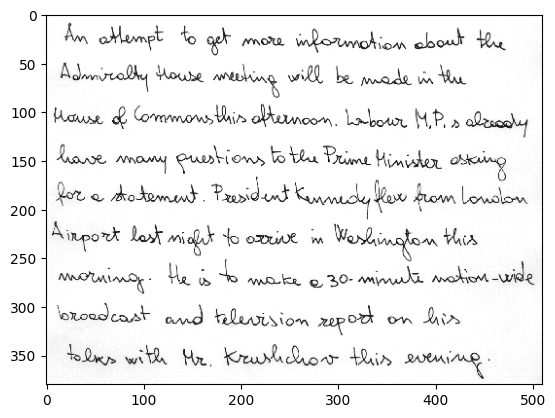

In [17]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

In [18]:
threshold_value = 100
a, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)


In [19]:
custom_oem_psm_config = r'--oem 3 --psm 6'

# Use pytesseract to get bounding box information for each word
data = pytesseract.image_to_data(image , config=custom_oem_psm_config, output_type=pytesseract.Output.DICT)

# Print the bounding box information
cropped_words_images = []

# Optionally, visualize the bounding boxes on the image
n_boxes = len(data['text'])
for i in range(n_boxes):
    if int(data['conf'][i]) > -1 and data['text'][i].strip() :  # Filter out low-confidence and empty text results
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        cropped_word = image[y:y+h, x:x+w]
        cropped_words_images.append(cropped_word)

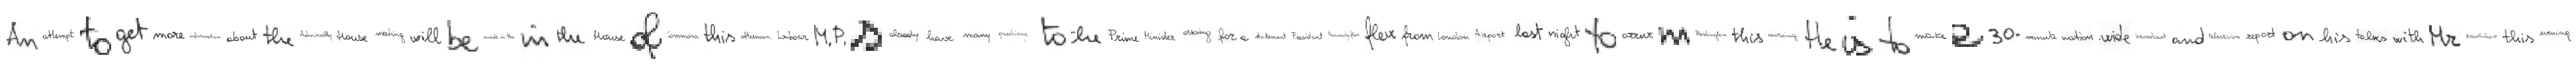

In [36]:

num_images = len(cropped_words_images)
fig, axes = plt.subplots(1, num_images, figsize=(50, 20))  # Adjust figsize as needed

for i, word_image in enumerate(cropped_words_images):
    axes[i].imshow(word_image, cmap='gray')
    axes[i].axis('off')  # Hide axes for a cleaner display

plt.show()